In [436]:
# Initialize Otter
import otter
grader = otter.Notebook("ProjPart1.ipynb")

# Project - Part 1: Exploring Cook County Housing

## Due Date: Thursday, April 18th, 11:59 PM MT on Gradescope

## NO LATE SUBMISSIONS will be accepted - you must plan accordingly.

## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Below are examples of acceptable vs unacceptable use of resources and collaboration when doing the Project assignments in CSCI 3022.


The following would be some **examples of cheating** when working on the Project in CSCI 3022.  Any of these constitute a **violation of the course's collaboration policy and will result in an F in the course and a trip to the honor council**.   


 - Consulting web pages that may have a solution to a given homework problem or one similar is cheating.  However, consulting the class notes, and web pages that explain the material taught in class but do NOT show a solution to the homework problem in question are permissible to view.  Clearly, there's a fuzzy line here between a valid use of resources and cheating. To avoid this line, one should merely consult the course notes, the course textbook, and references that contain syntax and/or formulas.
 - Copying a segment of code or math solution of three lines or more from another student from a printout, handwritten copy, or by looking at their computer screen 
 - Allowing another student to copy a segment of your code or math solution of three lines or more
 - Taking a copy of another student's work (or a solution found online) and then editing that copy
 - Reading someone else’s solution to a problem on the Project before writing your own.
 - Asking someone to write all or part of a program or solution for you.
 - Asking someone else for the code necessary to fix the error for you, other than for simple syntactical errors
 


On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a Project problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a Project solution that was your own when asked in office hours by a TA/Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor or teaching assistant rather than another student as this situation can easily
lead to a, possibly inadvertent, cheating situation.

We are here to help!  Visit HW Hours and/or post questions on Piazza!


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Introduction

This project explores what can be learned from an extensive housing dataset that is embedded in a dense social context in Cook County, Illinois.

In project A1 (this assignment), we will guide you through some basic Exploratory Data Analysis (EDA) to understand the structure of the data. Next, you will be adding a few new features to the dataset, while cleaning the data as well in the process.

In project A2 (the following assignment), you will specify and fit a linear model for the purpose of prediction. Finally, we will analyze the error of the model and brainstorm ways to improve the model's performance.


## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

Question | Manual | Points
----|----|----
1a | Yes | 2
1b | Yes | 2
1c | Yes | 2
1d | Yes | 2
2a | Yes | 2
2b | No | 2
3a | No | 2
3b | No | 2
3c | Yes | 2
4 | No | 4
5a | No | 2
5b | No | 4
5c | Yes | 4
6a | No | 2
6b | No | 4
6c | No | 4
6d | No | 2
7a | No | 2
7b | No | 4
Total | 7 | 50

In [437]:
import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

import hashlib

def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# The Data

The dataset consists of over 500,000 records from Cook County, Illinois, the county where Chicago is located. The dataset has 61 features in total; the 62nd is `Sale Price`, which you will predict with linear regression in the next part of this project. An explanation of each variable can be found in the included `codebook.txt` file (you can optionally open this by first clicking the `data` folder, then clicking `codebook.txt` file in the navigation pane). Some of the columns have been filtered out to ensure this assignment doesn't become overly long when dealing with data cleaning and formatting.

The data are split into training and test sets with 204,792 and 68,264 observations, respectively, but we will only be working on the training set for this part of the project.

Let's first extract the data from the `cook_county_data.zip`. Notice we didn't leave the `csv` files directly in the directory because they take up too much space without some prior compression. Just run the cells below: 

In [438]:
with zipfile.ZipFile('data/cook_county_data.zip') as item:
    item.extractall()

Let's load the training data.

In [439]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

As a good sanity check, we should at least verify that the data shape matches the description.

In [440]:
# 204792 observations and 62 features in training data
assert training_data.shape == (204792, 62)
# Sale Price is provided in the training data
assert 'Sale Price' in training_data.columns.values

The next order of business is getting a feel for the variables in our data.  A more detailed description of each variable is included in `codebook.txt` (in the same directory as this notebook).  **You should take some time to familiarize yourself with the codebook before moving forward.**

Let's take a quick look at all the current columns in our training data.

In [441]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [442]:
training_data['Description'][0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

<!-- BEGIN QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Contextualizing the Data

Let's try to understand the background of our dataset before diving into a full-scale analysis.

## Question 1a

Based on the columns present in this data set and the values that they take, what do you think each row represents? That is, what is the granularity of this data set? 


Each row represents a residential property sale in Cook County, Illnois. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
## Question 1b

Why do you think this data was collected? For what purposes? By whom?

This question calls for your speculation and is looking for thoughtfulness, not correctness. 


I think there are couple of options. One possibility is that this data could be for market research collected by a real estate firm in hopes of gaining an edge in property sales. Another could be for research in disparities collected by an organization focused on equality in housing with the goal of informing the public on potential inequities exising in Cook County.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
## Question 1c

Craft at least two questions about housing in Cook County that can be answered with this data set and provide the type of analytical tool you would use to answer it (e.g. "I would create a ___ plot of ___ and ___" or "I would calculate the ___ [summary statistic] for ___ and ____"). Be sure to reference the columns that you would use and any additional data sets you would need to answer that question.


Q1) What is the correlation and covariance between housing prices and noise from O'Hare?

A1) I would create a scatter plot, with price on the x-axis and O'Hare noise on the y-axis. I would want to then calculate the correlation and covariance of the two variables.

Q2) How do the average prices in homes compare from one neighborhood to another?

A2) I would make a boxplot of the homes in select neighborhood codes and compare them two at a time. Additionally I would take the neighborhoods of interest and run a permutation test to determine if they are from different populations. My statistic for the test would be neighborhood A - neighborhood B.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
## Question 1d

Suppose now, in addition to the information already contained in the dataset, you also have access to several new columns containing demographic data about the owner, including race/ethnicity, gender, age, annual income, and occupation. Provide one new question about housing in Cook County that can be answered using at least one column of demographic data and at least one column of existing data and provide the type of analytical tool you would use to answer it.

I would want to look at the average site desirability of black versus white people. I would also do a permutation test. I would simulate and shuffle the data and my test statistic would be the average site desirability of a white-owned home subtracted from the average site desirability of a black-owned home. I would then compare the simulation with the observed statisitic to see if there's any disparities between the two and whether or not the difference in means is statistically significant.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 2: Exploratory Data Analysis

This data set was collected by the [Cook County Assessor's Office](https://datacatalog.cookcountyil.gov/Property-Taxation/Archive-Cook-County-Assessor-s-Residential-Sales-D/5pge-nu6u) in order to build a model to predict the monetary value of a home (if you didn't put this for your answer for Question 1 Part 2, please don't go back and change it - we wanted speculation!). You can read more about data collection in the CCAO’s [Residential Data Integrity Preliminary Report](https://gitlab.com/ccao-data-science---modeling/ccao_sf_cama_dev/-/blob/master/documentation/Preliminary%20Report%20on%20Data%20Integrity%20June%207,%202019.pdf). In part 2 of this project you will be building a linear model that predict sales prices using training data but it's important to first understand how the structure of the data informs such a model. In this section, we will make a series of exploratory visualizations and feature engineering in preparation for that prediction task.

Note that we will perform EDA on the **training data**.

### Sale Price
We begin by examining the distribution of our target variable `Sale Price`. We have provided the following helper method `plot_distribution` that you can use to visualize the distribution of the `Sale Price` using both the histogram and the box plot at the same time. Run the following 2 cells.

In [443]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        x=data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

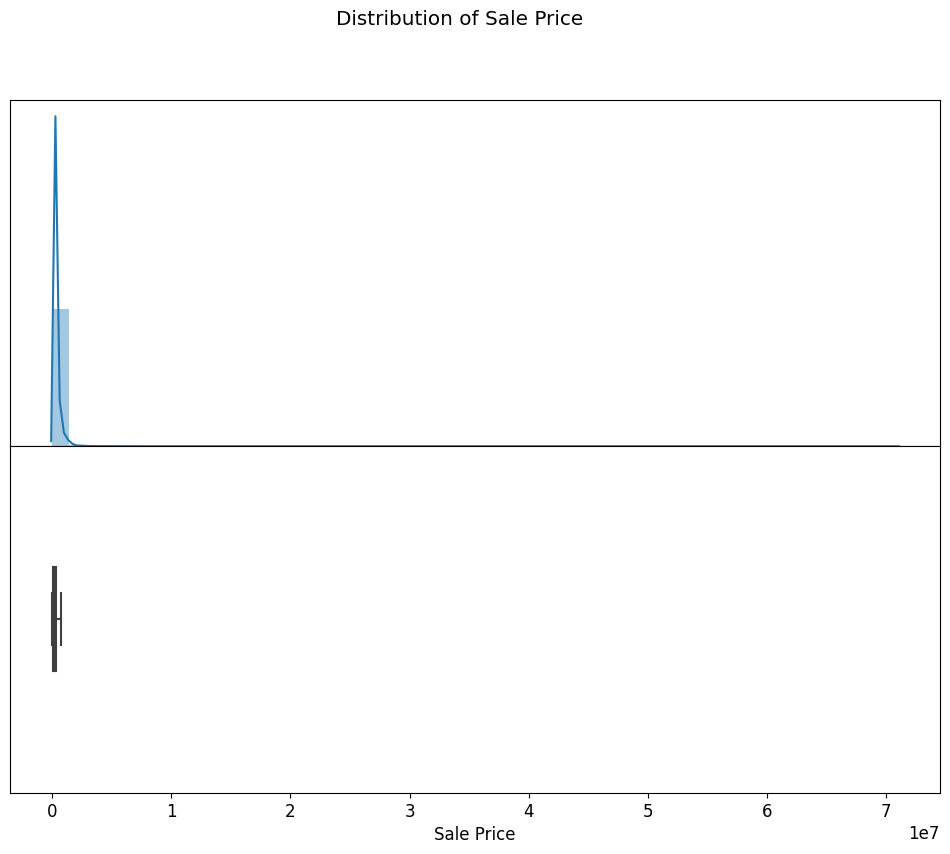

In [444]:
plot_distribution(training_data, label='Sale Price')

At the same time, we also take a look at some descriptive statistics of this variable. Run the following cell.

In [445]:
training_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

<!-- BEGIN QUESTION -->

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 2a

Using the plots above and the descriptive statistics from `training_data['Sale Price'].describe()` in the cells above, identify one issue with the visualization above and briefly describe one way to overcome it. 

Well one issue I've noticed, is that from `training_data['Sale Price'].value_counts()` is that there 35,546 homes whose price is one dollar. While interpolation of price could be possible, I think the best option with my skillset and for this project would be to drop the rows whose sale price is a dollar.

<!-- END QUESTION -->



In [446]:
# optional cell for scratch work
price_max = training_data['Sale Price'].max()
price_median = training_data['Sale Price'].median()
price_mean = training_data['Sale Price'].mean()

print(f"Max: {price_max} || Median: {price_median} || Mean: {price_mean:.2f}")

training_data['Sale Price'].value_counts()

Max: 71000000 || Median: 175000.0 || Mean: 245164.62


Sale Price
1         35546
250000     1252
200000     1232
150000     1189
175000     1118
          ...  
216756        1
70050         1
358590        1
215700        1
142515        1
Name: count, Length: 14720, dtype: int64

---
---
## Question 2b

To zoom in on the visualization of most households, we will focus only on a subset of `Sale Price` for this assignment. In addition, it may be a good idea to apply log transformation to `Sale Price`. In the cell below, reassign `training_data` to a new dataframe that is the same as the original one **except with the following changes**:

- `training_data` should contain only households whose price is at least $500.
- `training_data` should contain a new `Log Sale Price` column that contains the log-transformed sale prices.

**You should NOT remove the original column `Sale Price` as it will be helpful for later questions.** If you accidentally remove it, just restart your kernel and run the cells again.

**Note**: This also implies from now on, our target variable in the model will be the log-transformed sale prices from the column `Log Sale Price`. 

*To ensure that any error from this part does not propagate to later questions, there will be no hidden tests for this question.*



In [447]:
training_data = training_data[training_data['Sale Price'] >= 500]
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])

In [448]:
grader.check("q2b")

q2b results: All test cases passed!

Let's create a new distribution plot on the log-transformed sale price.

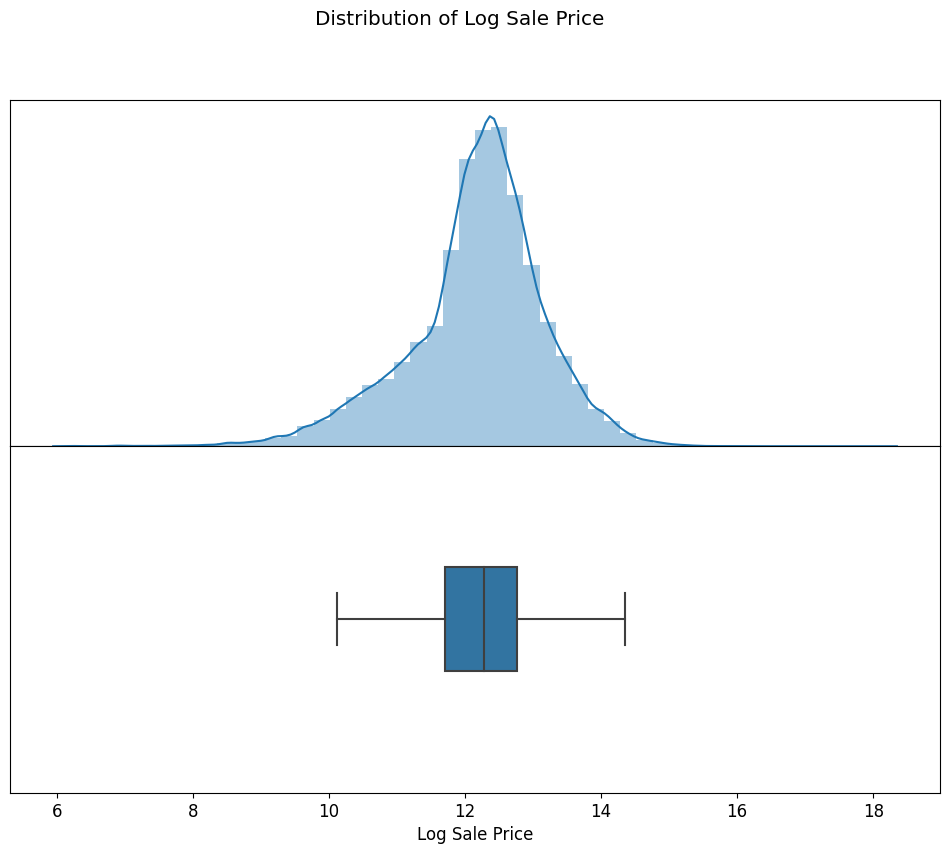

In [449]:
plot_distribution(training_data, label='Log Sale Price');

<br/>
<hr style="border: 1px solid #fdb515;" />

---
## Question 3a


Is the following statement correct? Assign your answer to `q3statement`.

     "At least 25% of the properties in the training set sold for more than $200,000.00."

**Note:** The provided test for this question does not confirm that you have answered correctly; only that you have assigned each variable to `True` or `False`.


In [450]:
# These should be True or False
k200 = sum(training_data['Sale Price'] > 200000)/len(training_data['Sale Price'])

q3statement = None
if k200 > .25:
    q3statement = True
else:
    q3statement = False

In [451]:
grader.check("q3a")

q3a results: All test cases passed!

<br><br>

---
## Question 3b

Next, we want to explore if there is any correlation between `Log Sale Price` and the total area occupied by the property. The `codebook.txt` file tells us the column `Building Square Feet` should do the trick -- it measures "(from the exterior) the total area, in square feet, occupied by the building".

Let's also apply a log transformation to the `Building Square Feet` column.

In the following cell, create a new column `Log Building Square Feet` in our `training_data` that contains the log-transformed area occupied by each property. 

**You should NOT remove the original `Building Square Feet` column this time, as it will be used for later questions**. If you accidentally remove it, just restart your kernel and run the cells again.

*To ensure that any errors from this part do not propagate to later questions, there will be no hidden tests for this question.*


In [452]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

In [453]:
grader.check("q3b")

q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 3c

In the visualization below, we created a `jointplot` with `Log Building Square Feet` on the x-axis, and `Log Sale Price` on the y-axis. In addition, we fit a simple linear regression line through the bivariate scatter plot in the middle.

Based on the following plot, would `Log Building Square Feet` make a good candidate as one of the features for our model? Why or why not?

**Hint:** To help answer this question, ask yourself: what kind of relationship does a “good” feature share with the target variable we aim to predict?

![Joint Plot](images/q2p3_jointplot.png)


`Log Building Square Feet` would be a good candidate as a feature for our model. I think this because they share a correlation that can be modeled with a linear regression. This makes it a 'good' feature as we have some basis for predictability due to the relationship between the two variables.

<!-- END QUESTION -->

---
## Question 4

Continuing from the previous part, as you explore the dataset, you might still run into more outliers that prevent you from creating a clear visualization or capturing the trend of the majority of the houses. 

For this assignment, we will work to remove these outliers from the data as we run into them. Write a function `remove_outliers` that removes outliers from the dataset based off a threshold value of a variable. For example, `remove_outliers(training_data, 'Building Square Feet', lower=500, upper=8000)` should return a copy of `data` with only observations that satisfy `Building Square Feet` less than or equal to 8000 (inclusive) and `Building Square Feet` greater than 500 (exclusive).

**Note:** The provided tests simply check that the `remove_outliers` function you defined does not mutate the input data inplace. However, the provided tests do not check that you have implemented `remove_outliers` correctly so that it works with any data, variable, lower, and upper bound.

In [454]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    data = data[data[variable] > lower]
    data = data[data[variable] <= upper]
    return data

In [455]:
grader.check("q4")

q4 results: All test cases passed!

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

# Part 3: Feature Engineering

In this section, we will walk you through a few feature engineering techniques. 

### Bedrooms

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the `Bedrooms` column doesn't actually exist in the original `DataFrame`! Instead, it is part of the `Description` column.

<br><br>

---
## Question 5a

Let's take a closer look at the `Description` column first. Compare the description across a few rows together at the same time. For the following list of variables, how many of them can be extracted from the `Description` column? Assign your answer to a list of integers corresponding to the statements that you think are true (ie. `[1, 2, 3]`).

1. The date the property was sold on.
2. The number of stories the property contains.
3. The previous owner of the property.
4. The address of the property.
5. The number of garages the property has.
6. The total number of rooms inside the property.
7. The total number of bedrooms inside the property.
8. The total number of bathrooms inside the property.

In [456]:
# optional cell for scratch work 

In [457]:
q5a = [1, 2, 4, 6, 7, 8]

In [458]:
grader.check("q5a")

q5a results: All test cases passed!

<br><br>

---

**Regex**


A **regular expression** (“RegEx”) is a sequence of characters that specifies a search pattern. They are written to extract specific information from text. Regular expressions are essentially part of a smaller programming language embedded in python, made available through the re module. As such, they have a stand-alone syntax and methods for various capabilities.

There are a ton of resources to learn and experiment with regular expressions. A few are provided below:

 - [Regex Reference Sheet](https://ds100.org/sp22/resources/assets/hw/regex_reference.pdf)
 - [Official Regex Guide](https://docs.python.org/3/howto/regex.html)
 - [Regex101.com](https://regex101.com/)
  - Be sure to check Python under the category on the left.


Below we work through an example of how to use `regex` to extract the total number of bathrooms from the `Description` column.    

Then you'll apply this knowledge to write your own function to add a column to the dataset with the total number of bedrooms (**as an integer**) for each house.


In [459]:
# Print out Description column and notice where/how bathrooms are saved:
print(training_data["Description"][1])
print("")
print(training_data["Description"][60])

This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.

This property, sold on 10/11/2016, is a two-story houeshold located at 123 S LANCASTER AVE.It has a total of 9 rooms, 4 of which are bedrooms, and 2.5 of which are bathrooms.


Notice the number of bathrooms always shows up in the following statement "and x.y of which are bathrooms." 

Wait, why are these floating point numbers?  Here's how full versus half bathrooms are defined:
 - A full bathroom consists of four main elements — a sink, toilet, shower, and bathtub. 
 - A half-bath is a bathroom that contains two of the four elements, usually a sink and toilet, though in some cases a half-bath could just contain a shower and tub. 


To extract "x.y" as a float from the description column, we can use the following Regular Expression:


`bedrooms_regex = r'and (\d+\.\d) of which are bathrooms'`


 - The `r` preceding the regular expression pattern specifies the regular expression is a raw string. Raw strings do not recognize escape sequences (i.e., the Python newline metacharacter \n). This makes them useful for regular expressions, which often contain literal \ characters. In other words, don’t forget to tag your RegEx with an r.


 - The `(\d+)` is a Regular Expression pattern:
   -  The ( ) specifies the group that you want to capture.
 
   - `\d` is a regex pattern for digit (0-9)

   - `+` is a regex pattern for at least (one or more) 
 
   - `\.` is a decimal point
   
   - We include a second `\d` since we want to grab the number after the decimal point (that is whether there are any 1/2 bathrooms as well)
 
   
 
 
 We can then use [str.extract](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) to output this information:
 

In [460]:
# Copy the first 10 rows to use as an example set
example_df = training_data[["Description"]][:10].copy()

# Create a Regex with the format of the bathroom information
bathrooms_regex = r'and (\d+\.\d) of which are bathrooms.'

# Extract the bathroom information fromzthe "Description" column
example_output = example_df["Description"].str.extract(bathrooms_regex).astype(float)

example_output

,0
1,1.0
2,1.0
3,1.5
4,1.0
6,1.5
7,2.5
8,2.0
9,1.5
10,1.0
11,1.0



<br><br>

---
## Question 5b

Now it's your turn: 

Write a function `add_total_bedrooms(data)` that returns a copy of `data` with an additional column called `Bedrooms` that contains the **total number of bedrooms (as integers**) for each house. Treat missing values as zeros, if necessary. Remember that you can make use of vectorized code here; you shouldn't need any `for` statements. 

**Hint**: You should consider inspecting the `Description` column to figure out if there is any general structure within the text. Once you have noticed a certain pattern, you are set with the power of Regex!

In [461]:
def add_total_bedrooms(data):
    """
    Input:
      data (data frame): a data frame containing at least the Description column.
    """
    with_rooms = data.copy()
    rooms_regex = r'(\d+)\s+of which are bedrooms'
    rooms = with_rooms["Description"].str.extract(rooms_regex).astype(int)
    
    rooms = rooms.fillna(0)
    with_rooms['Bedrooms'] = rooms
    
    return with_rooms

training_data = add_total_bedrooms(training_data)

In [462]:
grader.check("q5b")

q5b results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

<br><br>

---
## Question 5c

Create a visualization that clearly and succinctly shows if there exists an association between  `Bedrooms` and `Log Sale Price`. A good visualization should satisfy the following requirements:
- It should avoid overplotting.
- It should have clearly labeled axes and a succinct title.
- It should convey the strength of the correlation between `Sale Price` and the number of rooms: in other words, you should be able to look at the plot and describe the general relationship between `Log Sale Price` and `Bedrooms`

**Hint**: A direct scatter plot of the `Sale Price` against the number of rooms for all of the households in our training data would result in overplotting (since there are only a small discrete number of bedrooms) - so **don't use a scatter plot**.


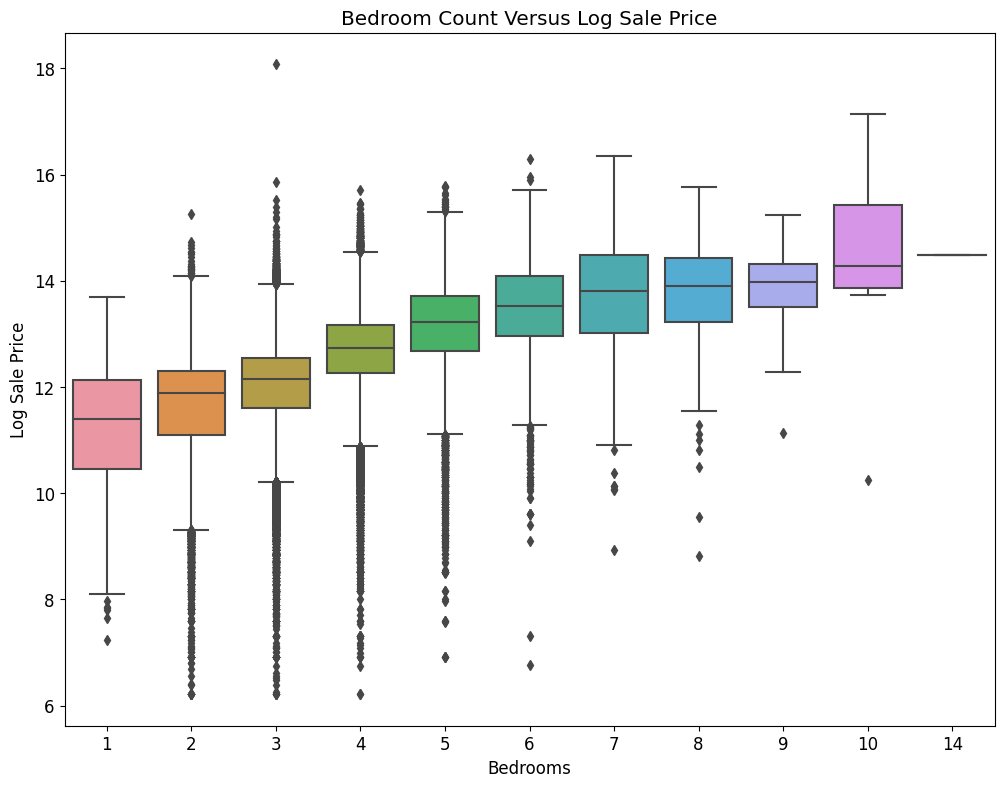

In [463]:
# Create a boxplot
sns.boxplot(x = training_data['Bedrooms'], y = training_data['Log Sale Price'])
plt.title('Bedroom Count Versus Log Sale Price')
plt.show()

<!-- END QUESTION -->

<br><br>

---


Now, let's take a look at the relationship between neighborhood and sale prices of the houses in our dataset.
Notice that currently we don't have the actual names for the neighborhoods. Instead we will use a similar column `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office).


## Question 6a

Before creating any visualization, let's quickly inspect how many different neighborhoods we are dealing with.

Assign the variable `num_neighborhoods` with the total number of unique neighborhoods in `training_data`. 


In [464]:
num_neighborhoods = len(training_data['Neighborhood Code'].unique())
num_neighborhoods

193

In [465]:
grader.check("q6a")

q6a results: All test cases passed!

<br><br>

---
## Question 6b

If we try directly plotting the distribution of `Log Sale Price` for all of the households in each neighborhood using the `plot_categorical` function from the next cell, we would get the following visualization.


![overplot](images/q5p2_catplot.png)

In [466]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

Oh no, looks like we have run into the problem of overplotting again! 

You might have noticed that the graph is overplotted because **there are actually quite a few neighborhoods in our dataset**! For the clarity of our visualization, we will have to zoom in again on a few of them. The reason for this is our visualization will become quite cluttered with a super dense x-axis.

Assign the variable `in_top_20_neighborhoods` to a copy of `training_data` that has been filtered to only contain rows corresponding to properties that are in one of the top 20 most populous neighborhoods. We define the “top 20 neighborhoods” as being the 20 neighborhood codes that have the greatest number of properties within them.


In [467]:
twentyseries = np.array(training_data['Neighborhood Code'].value_counts().index[0:20])
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(twentyseries)]

in_top_20_neighborhoods

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2
8,13232040260000,205,70,3100.0,71,0.0,2.0,2.0,1.0,3.0,...,10.0,1,1.0,70,7170,"This property, sold on 08/25/2016, is a two-st...",3100.0,13.422468,7.636270,4
10,19074270080000,202,380,3750.0,72,0.0,1.0,1.0,2.0,3.0,...,7.4,1,1.0,380,72380,"This property, sold on 05/01/2017, is a one-st...",3750.0,11.695247,6.841615,2
11,15083050330000,203,20,5092.0,31,0.0,2.0,1.0,1.0,1.0,...,5.8,1,1.0,20,3120,"This property, sold on 04/29/2014, is a one-st...",5092.0,11.184421,6.911747,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204781,20361190390000,203,80,4405.0,70,0.0,2.0,1.0,1.0,3.0,...,5.7,1,1.0,80,7080,"This property, sold on 07/15/2013, is a one-st...",4405.0,10.913269,7.141245,3
204785,9284030280000,202,40,6650.0,22,0.0,1.0,1.0,1.0,3.0,...,6.1,1,1.0,40,2240,"This property, sold on 04/03/2014, is a one-st...",6650.0,11.736069,6.761573,3
204786,8141120110000,203,100,10010.0,16,0.0,2.0,1.0,1.0,1.0,...,5.6,1,1.0,100,16100,"This property, sold on 09/08/2016, is a one-st...",10010.0,12.568978,6.948897,3
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,3


In [468]:
grader.check("q6b")

q6b results: All test cases passed!

Let's create another of the distribution of sale price within in each neighborhood again, but this time with a narrower focus!

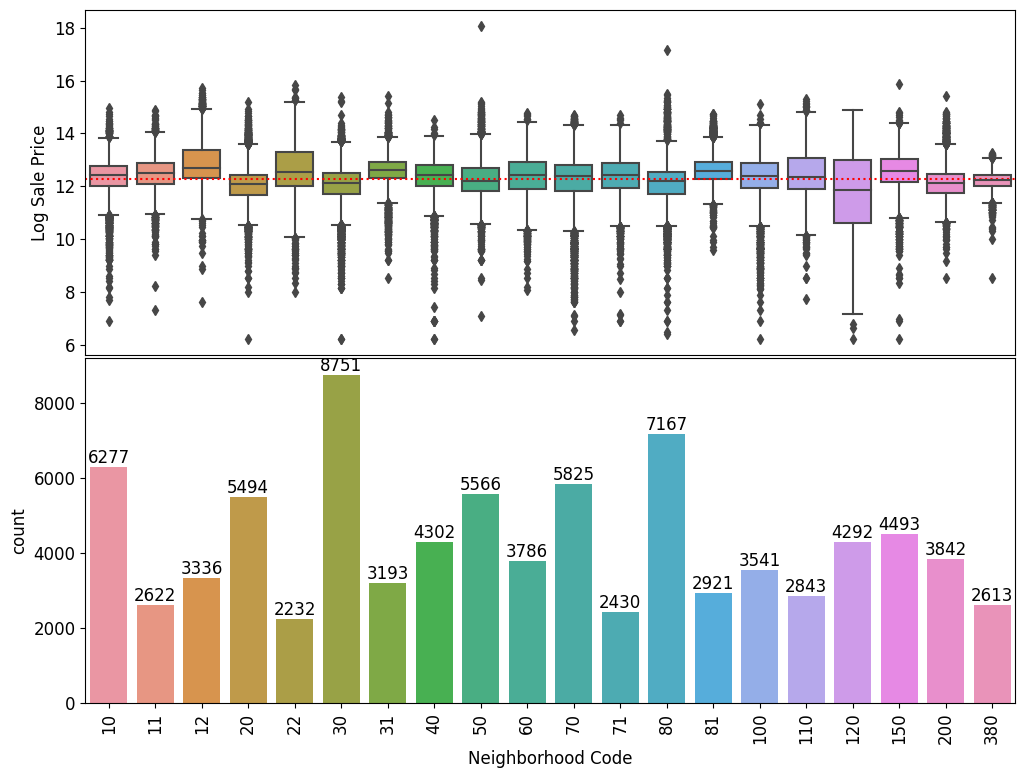

In [469]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

<br><br>

---
## Question 6c

From the plot above, we can see that there is much less data available for some neighborhoods. For example, Neighborhood 71 has only around 27% of the number of datapoints as Neighborhood 30.

One way we can deal with the lack of data from some neighborhoods is to create a new feature that bins neighborhoods together. We’ll categorize our neighborhoods in a crude way. In Question 6c, we’ll compute how “expensive” each neighborhood is by aggregating the `Log Sale Price`s for all properties in a particular neighborhood using a `metric`, such as the median. We’ll use this `metric` to find the top `n` most expensive neighborhoods. Then, in Question 6d, we’ll label these “expensive neighborhoods” and leave all other neighborhoods unmarked.

Fill in `find_expensive_neighborhoods` to return a **list** of the neighborhood codes of the **top `n`** most expensive neighborhoods as measured by our choice of aggregating function, `metric`.

For example, calling `find_expensive_neighborhoods(training_data, n=3, metric=np.median)` should return the 3 neighborhood codes with the highest median `Log Sale Price` computed across all properties in those neighborhood codes. 


In [470]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (data frame): should contain at least a string-valued 'Neighborhood Code'
        and a numeric 'Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods as measured by the metric function
    """
    if metric == np.median:
        neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].median().sort_values(ascending = False)
    if metric == np.mean:
        neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].mean().sort_values(ascending = False)
        
    neighborhoods = neighborhoods[0:n].index
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

In [471]:
grader.check("q6c")

q6c results: All test cases passed!

<br><br>

---
## Question 6d

We now have a list of neighborhoods we've deemed as higher-priced than others.  Let's use that information to write an additional function `add_expensive_neighborhood` that takes in a `DataFrame` of housing data (`data`) and a list of neighborhood codes considered to be expensive (`expensive_neighborhoods`). You can think of `expensive_neighborhoods` as being the output of the function `find_expensive_neighborhoods` from Question 6c. 

Using these inputs, `add_expensive_neighborhood` should add a column to `data` named `in_expensive_neighborhood` that takes on the **integer** value of 1 if a property is part of a neighborhood in `expensive_neighborhoods` and the integer value of 0 if it is not. This type of variable is known as an **indicator variable**.

**Hint:** [`pd.Series.astype`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.astype.html) may be useful for converting `True`/`False` values to integers.


In [472]:
def add_in_expensive_neighborhood(data, neighborhoods):
    """
    Input:
      data (data frame): a data frame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      data frame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(neighborhoods)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

training_data.head()

len(training_data[training_data["in_expensive_neighborhood"]==1])

1290

In [473]:
grader.check("q6d")

q6d results: All test cases passed!

<br><br>

In the following question, we will take a closer look at the `Roof Material` feature of the dataset and examine how we can incorporate categorical features into the linear models we will be developing in Part 2 of the project.

---
## Question 7a

If we look at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the `Roof Material` column.
```
Roof Material (Nominal): 

       1    Shingle/Asphalt
       2    Tar&Gravel
       3    Slate
       4    Shake
       5    Tile
       6    Other
```

**NOTE** that Tar&Gravel has no spaces. That is, 'Tar&Gravel' $\neq$ 'Tar & Gravel'

Write a function `substitute_roof_material` that replaces each numerical value in `Roof Material` with a `string` of the corresponding roof material. Your function should return a new `DataFrame`, not modify the existing `DataFrame`.

**Hint**: the `DataFrame.replace` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)) method may be useful here.



In [507]:
def substitute_roof_material(data):
    """
    Input:
      data (data frame): a data frame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      data frame identical to the input except with a refactored 'Roof Material' column
    """
    roof_materials = {
    1: 'Shingle/Asphalt',
    2: 'Tar&Gravel',
    3: 'Slate',
    4: 'Shake',
    5: 'Tile',
    6: 'Other'
    }
    
    data['Roof Material'] = data['Roof Material'].replace(roof_materials)

    return data
    
training_data = substitute_roof_material(training_data)

In [508]:
grader.check("q7a")

q7a results: All test cases passed!

---
## Question 7b

#### One Hot Encoding 

Unfortunately, simply fixing these missing values isn't sufficient for using `Roof Material` in our model.  Since `Roof Material` is a categorical variable, we will have to one-hot-encode the data.  Notice in the example code below that we have to pre-specify the categories. 

 - For more information on why we want to use one-hot-encoding, refer to this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Complete the following function `ohe_roof_material` that returns a copy of the original dataframe with the new column one-hot-encoded on the roof material of the household. These new columns should have the form `Roof Material_MATERIAL`.  In this problem we only wish to construct the one-hot-encoding columns **without removing any columns**. Your function should return **a new DataFrame, not modify the existing DataFrame.**  

**Note**: You should **avoid using `pd.get_dummies`** in your solution as it will remove your original column and is therefore not as reusable as your constructed data preprocessing pipeline. Instead, you can one-hot-encode one column into multiple columns **using Scikit-learn's [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)**. It's far more customizable!  


*Hint*: To get you started with this subpart, here is code that initializes a `OneHotEncoding` pre-processing "model" from Scikit-learn and fits it on a simple dataset containing random names. Please play with this code before jumping into the roof material data if you are unsure how to approach the question using `OneHotEncoder`.


In [ ]:
# Sample code to demonstrate One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc.fit([['Anirudhan'], ['Dominic'], ['Rahul'], ['Rahul'], ['Anirudhan'], ['Yike'], ['Vasanth']]);
oh_enc.transform([['Anirudhan'], ['Rahul'], ['Dominic']]).toarray()


array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [512]:
from sklearn.preprocessing import OneHotEncoder


def ohe_roof_material(data):
    """
    One-hot-encodes roof material.  New columns are of the form "Roof Material_MATERIAL"
    """
    oh_roof = OneHotEncoder()
    oh_roof.fit([['Shingle/Asphalt'], ['Tar&Gravel'], ['Slate'], ['Shake'], ['Tile'], ['Other']])
    data["Roof Material_MATERIAL"] = [oh_roof.transform(data.iloc[]).toarray()]
    
training_data_ohe = ohe_roof_material(training_data)
#This line of code will display only the one-hot-encoded columns in training_data_ohe that 
# have names that begin with “Roof Material_" 
training_data_ohe.filter(regex='^Roof Material_').head(5)

AttributeError: 'NoneType' object has no attribute 'filter'

In [ ]:
grader.check("q7b")

## Congratulations! You have finished the Project - Part 1

What's next? In Part 2 of the Project, you will focus on building a linear regression model to predict house prices. You will be well-prepared to build such a model: you have considered what is in this dataset, what it can be used for, and engineered some features that should be useful for prediction. However, before we proceed in creating a house-pricing model for Cook County, we will need to consider some challenging social implications that this model may carry. We’ll explore these in greater detail in a video accompanying Project Part2.



If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='ProjPart1.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [513]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2b results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!

    q4 results: All test cases passed!

    q5a results: All test cases passed!

    q5b results: All test cases passed!

    q6a results: All test cases passed!

    q6b results: All test cases passed!

    q6c results: All test cases passed!

    q6d results: All test cases passed!

    q7a results: All test cases passed!

    q7b results:
        q7b - 1 result:
            ❌ Test case failed
            Trying:
                assert (training_data_ohe.shape == (168931, 72))
            Expecting nothing
            **********************************************************************
            Line 1, in q7b 0
            Failed example:
                assert (training_data_ohe.shape == (168931, 72))
            Exce